## Производные функций нескольких переменных

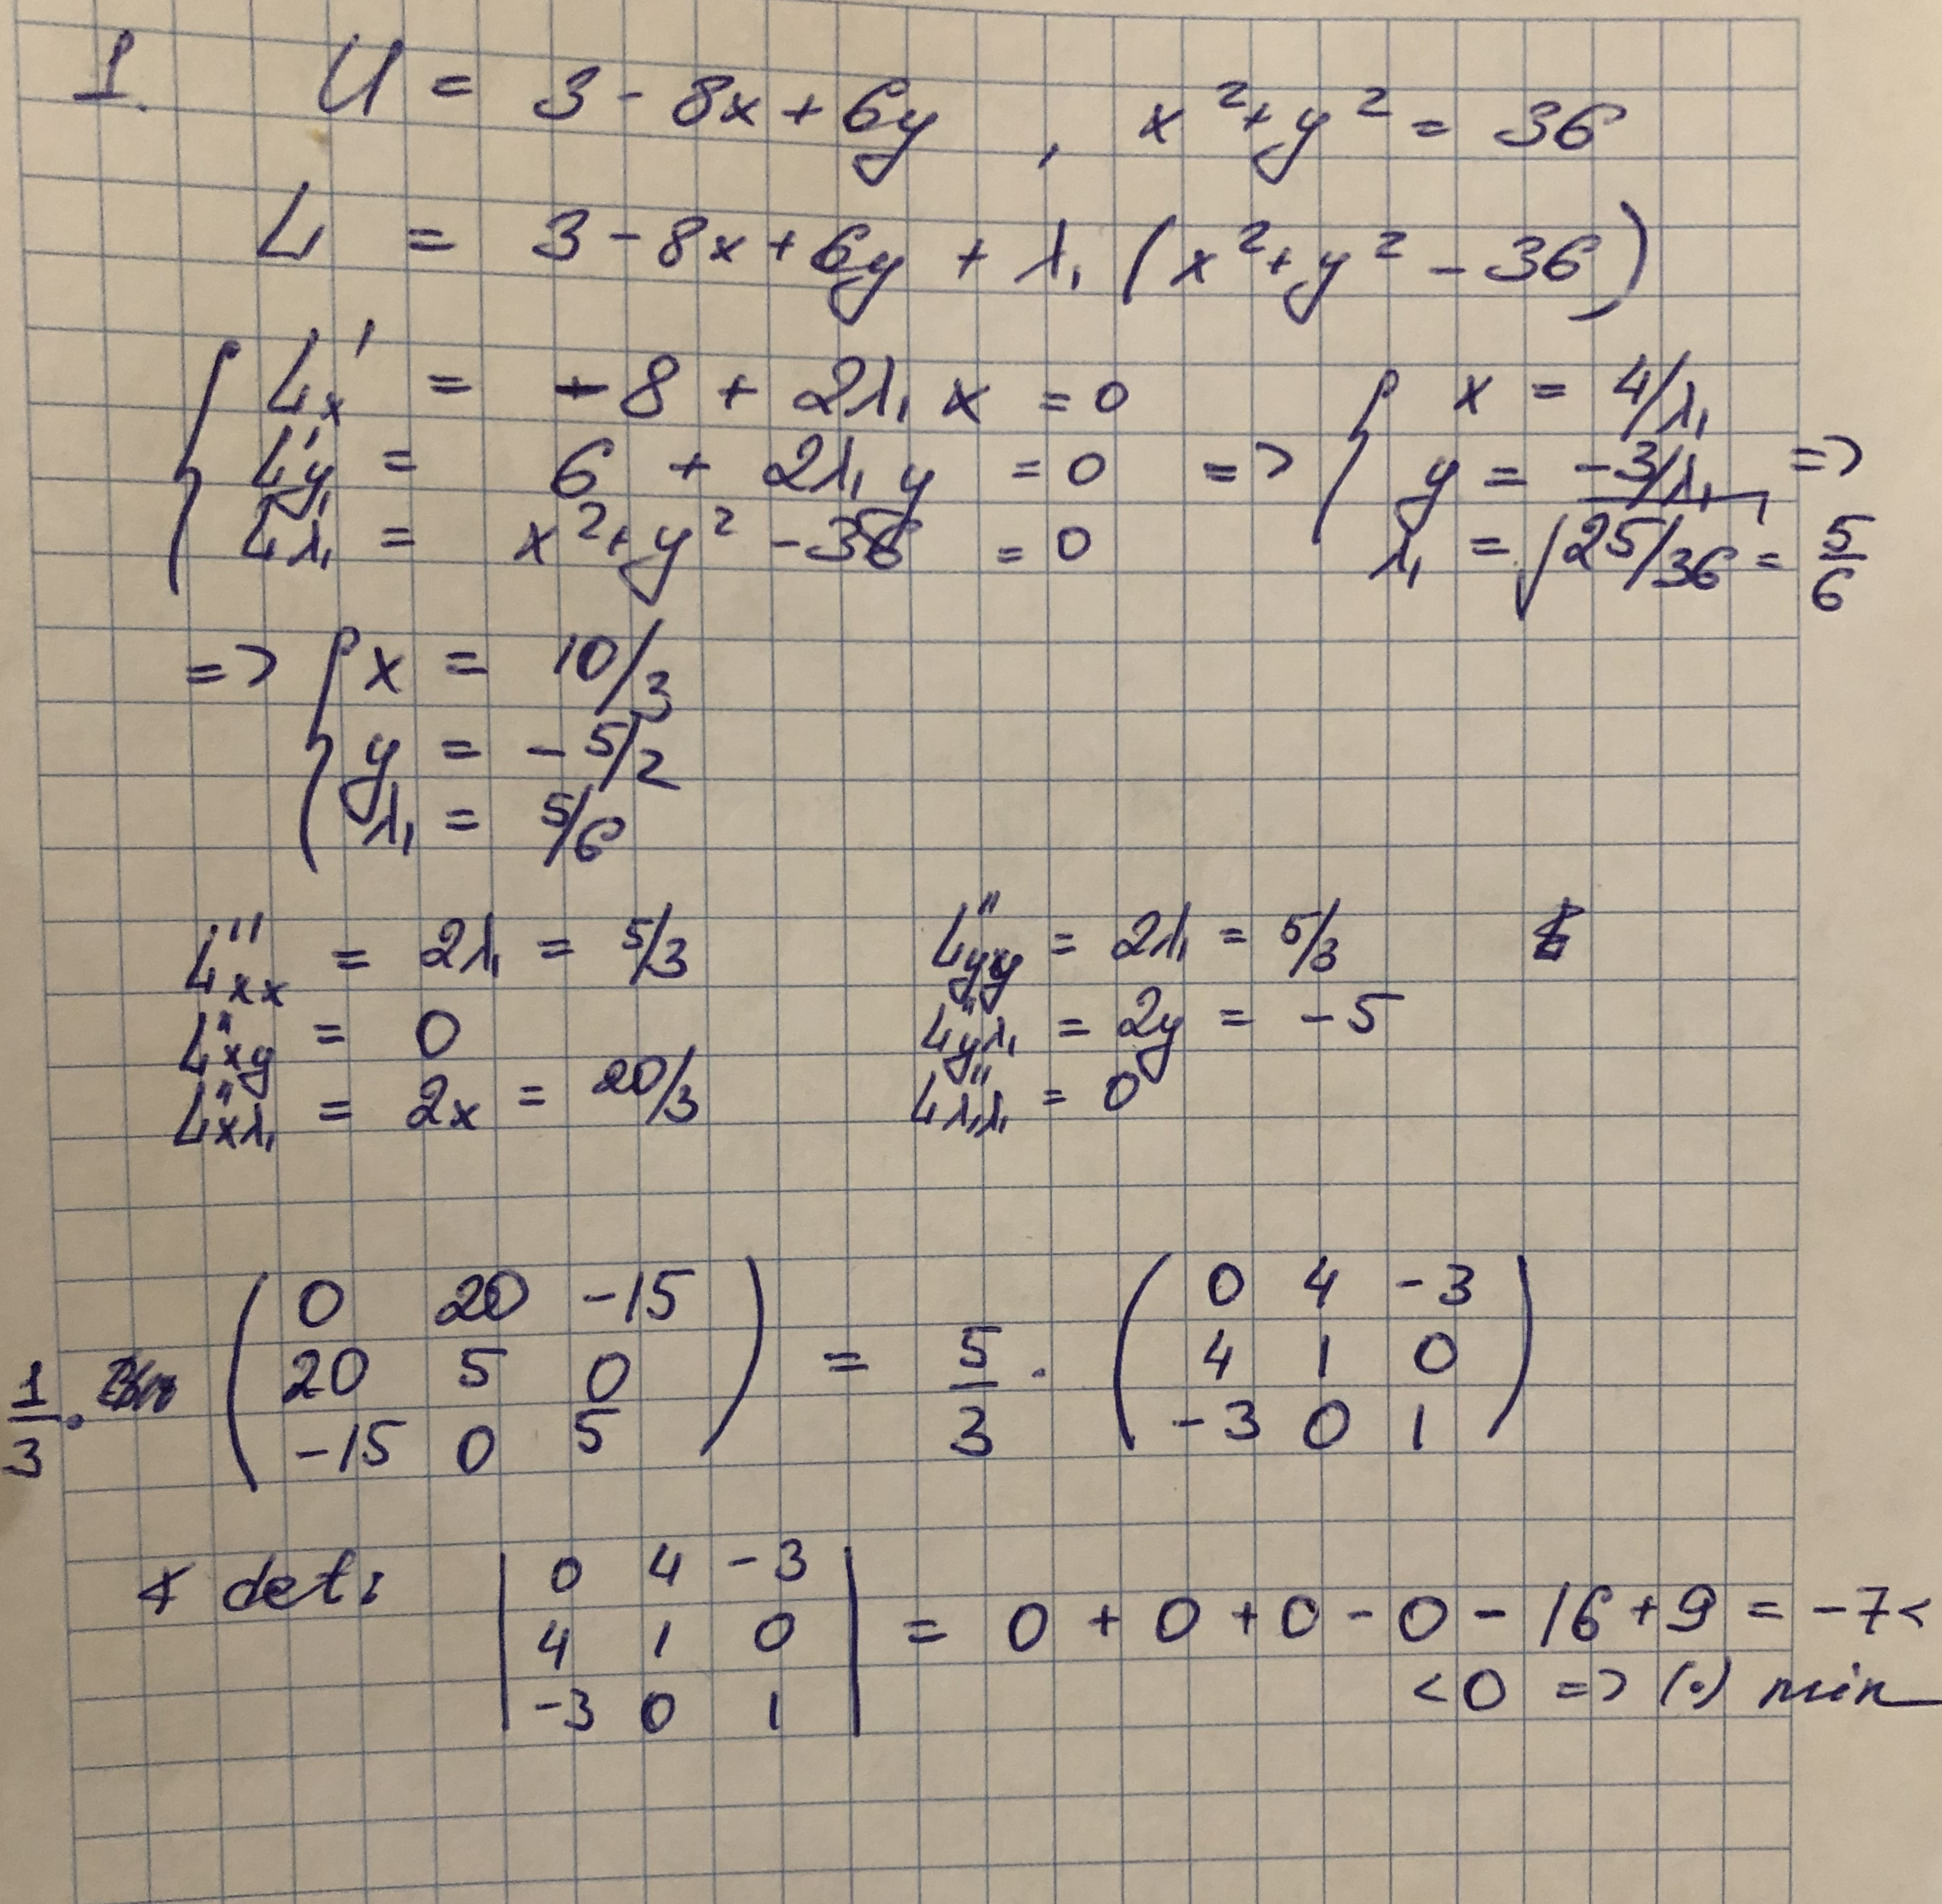

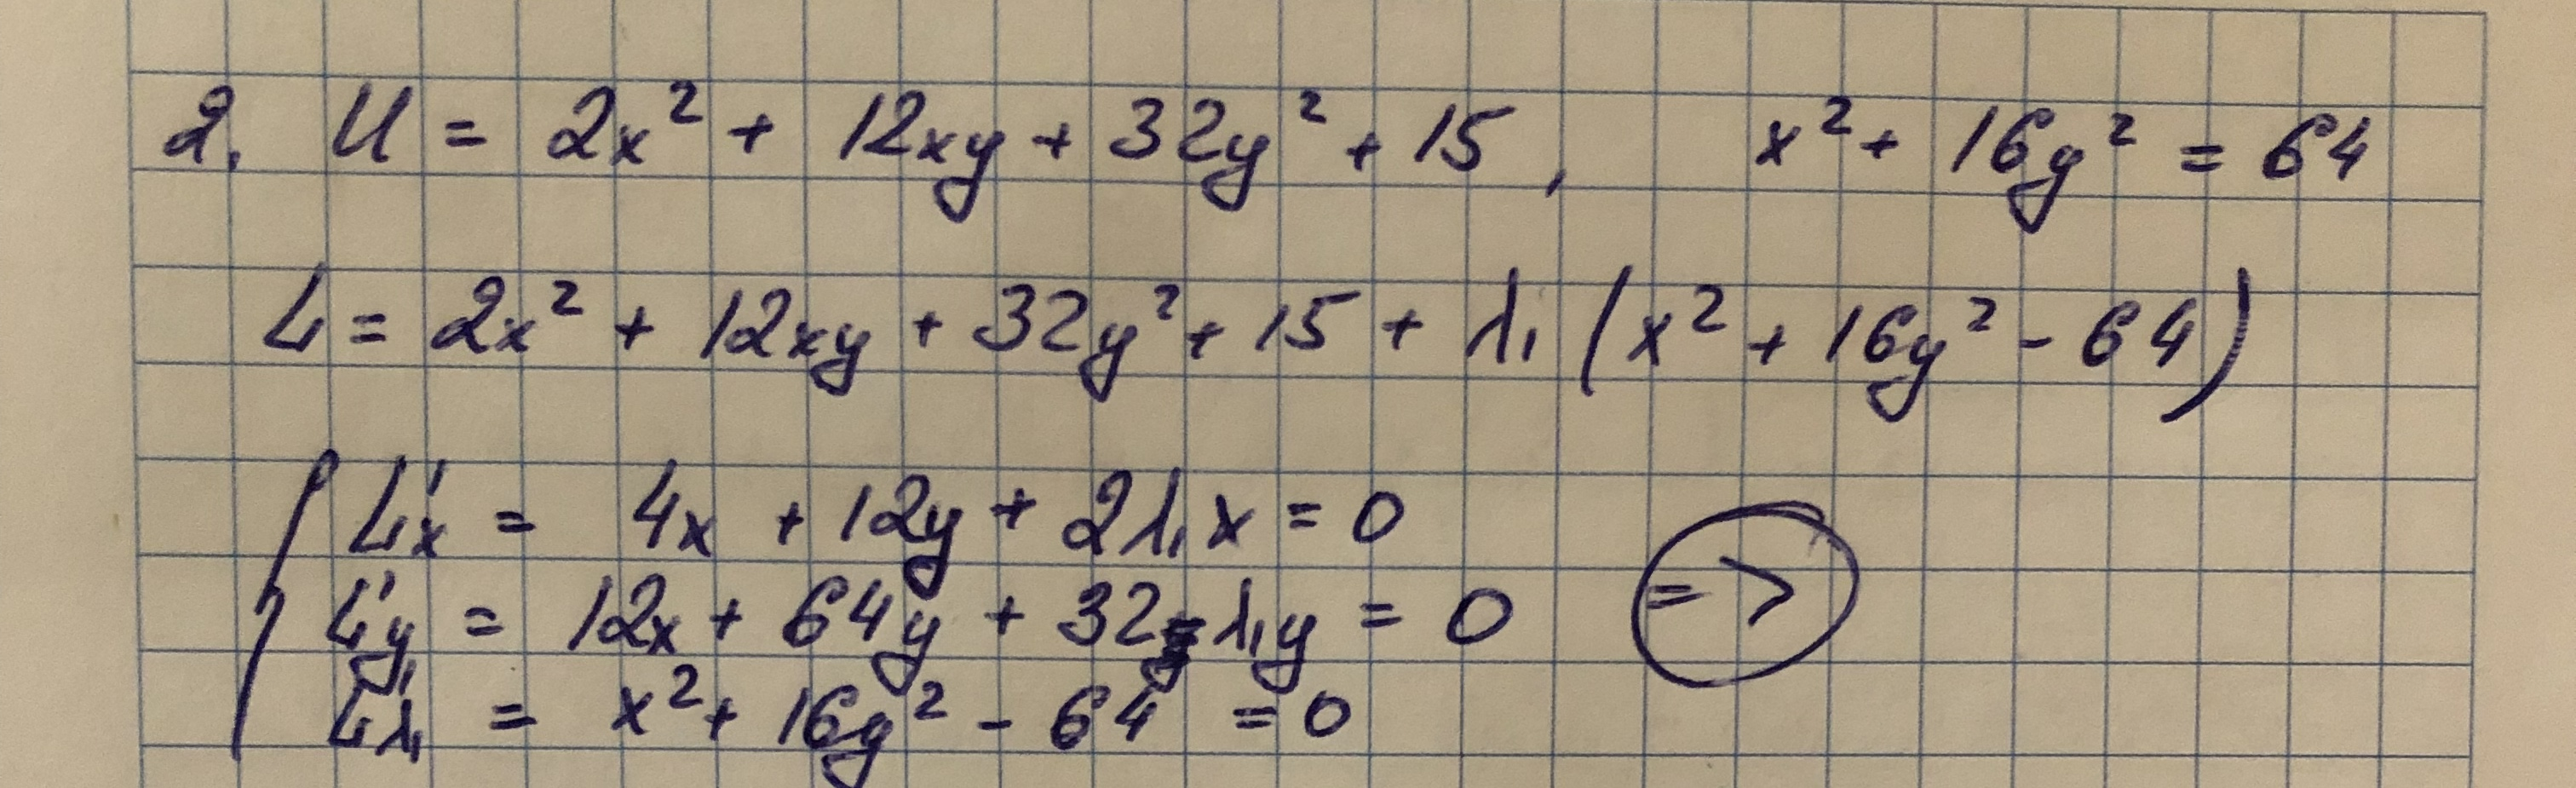

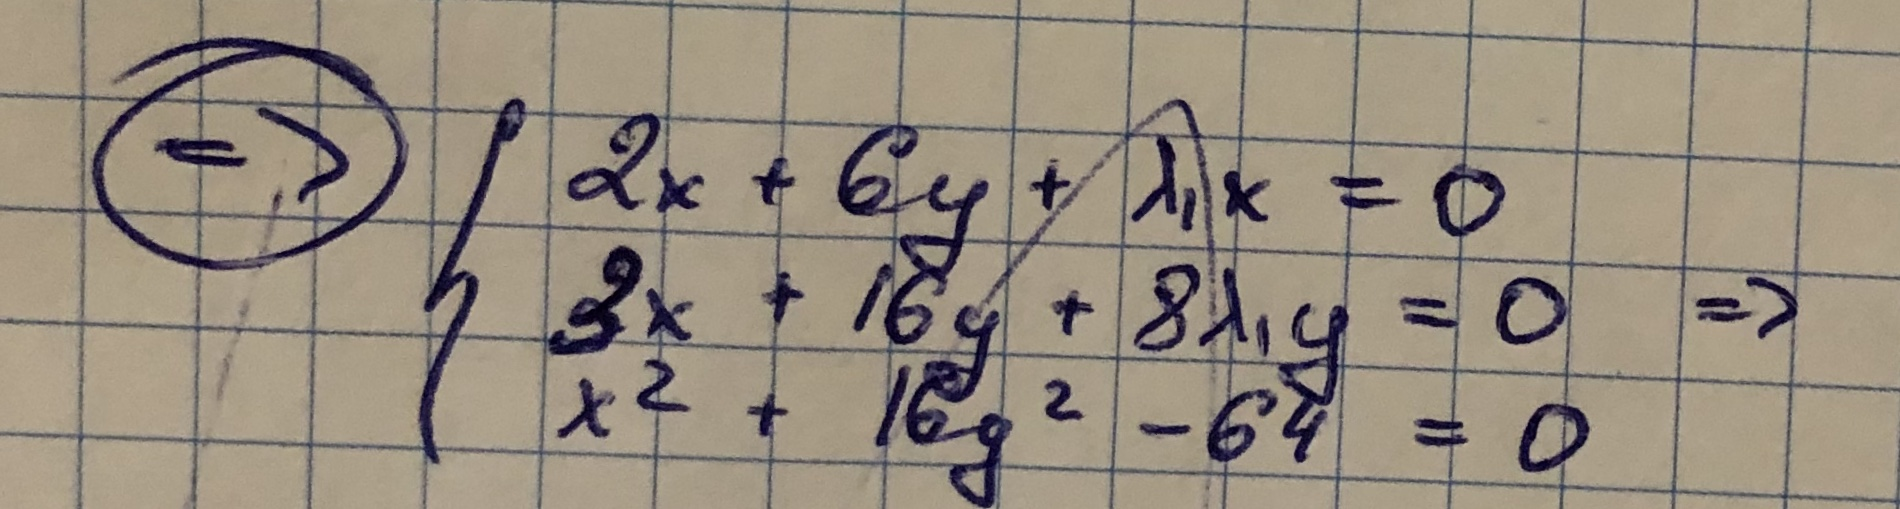

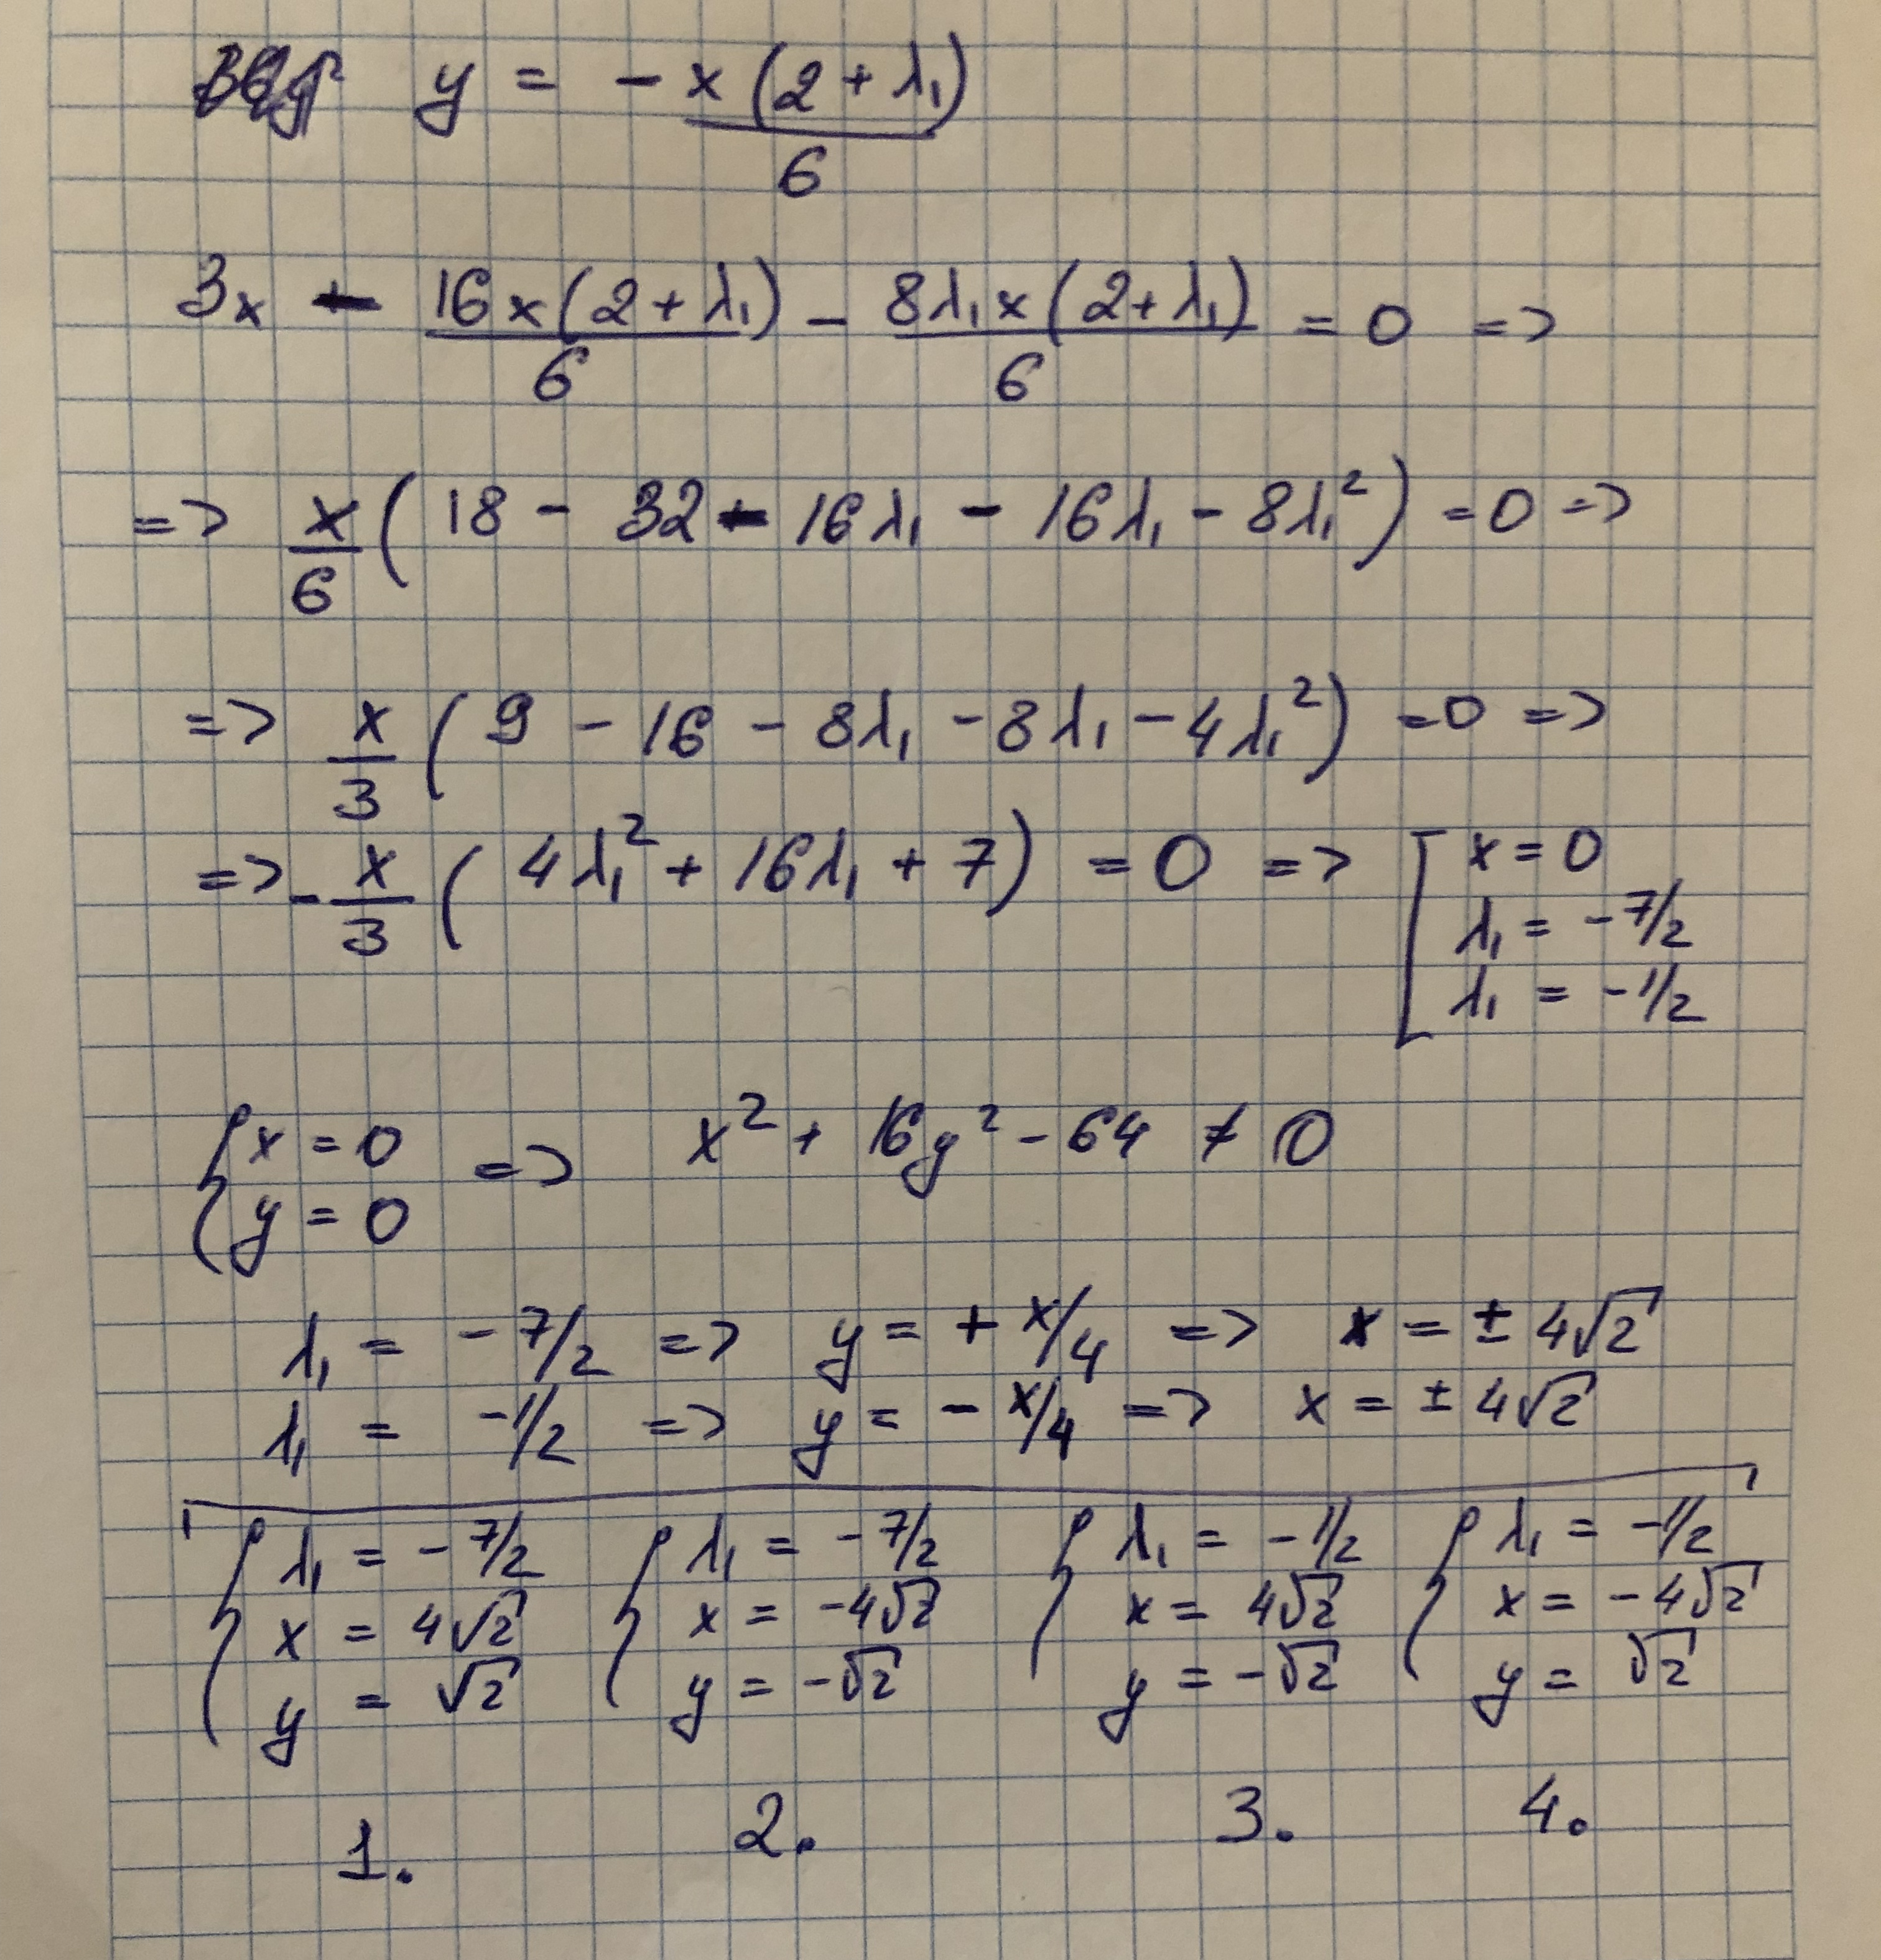

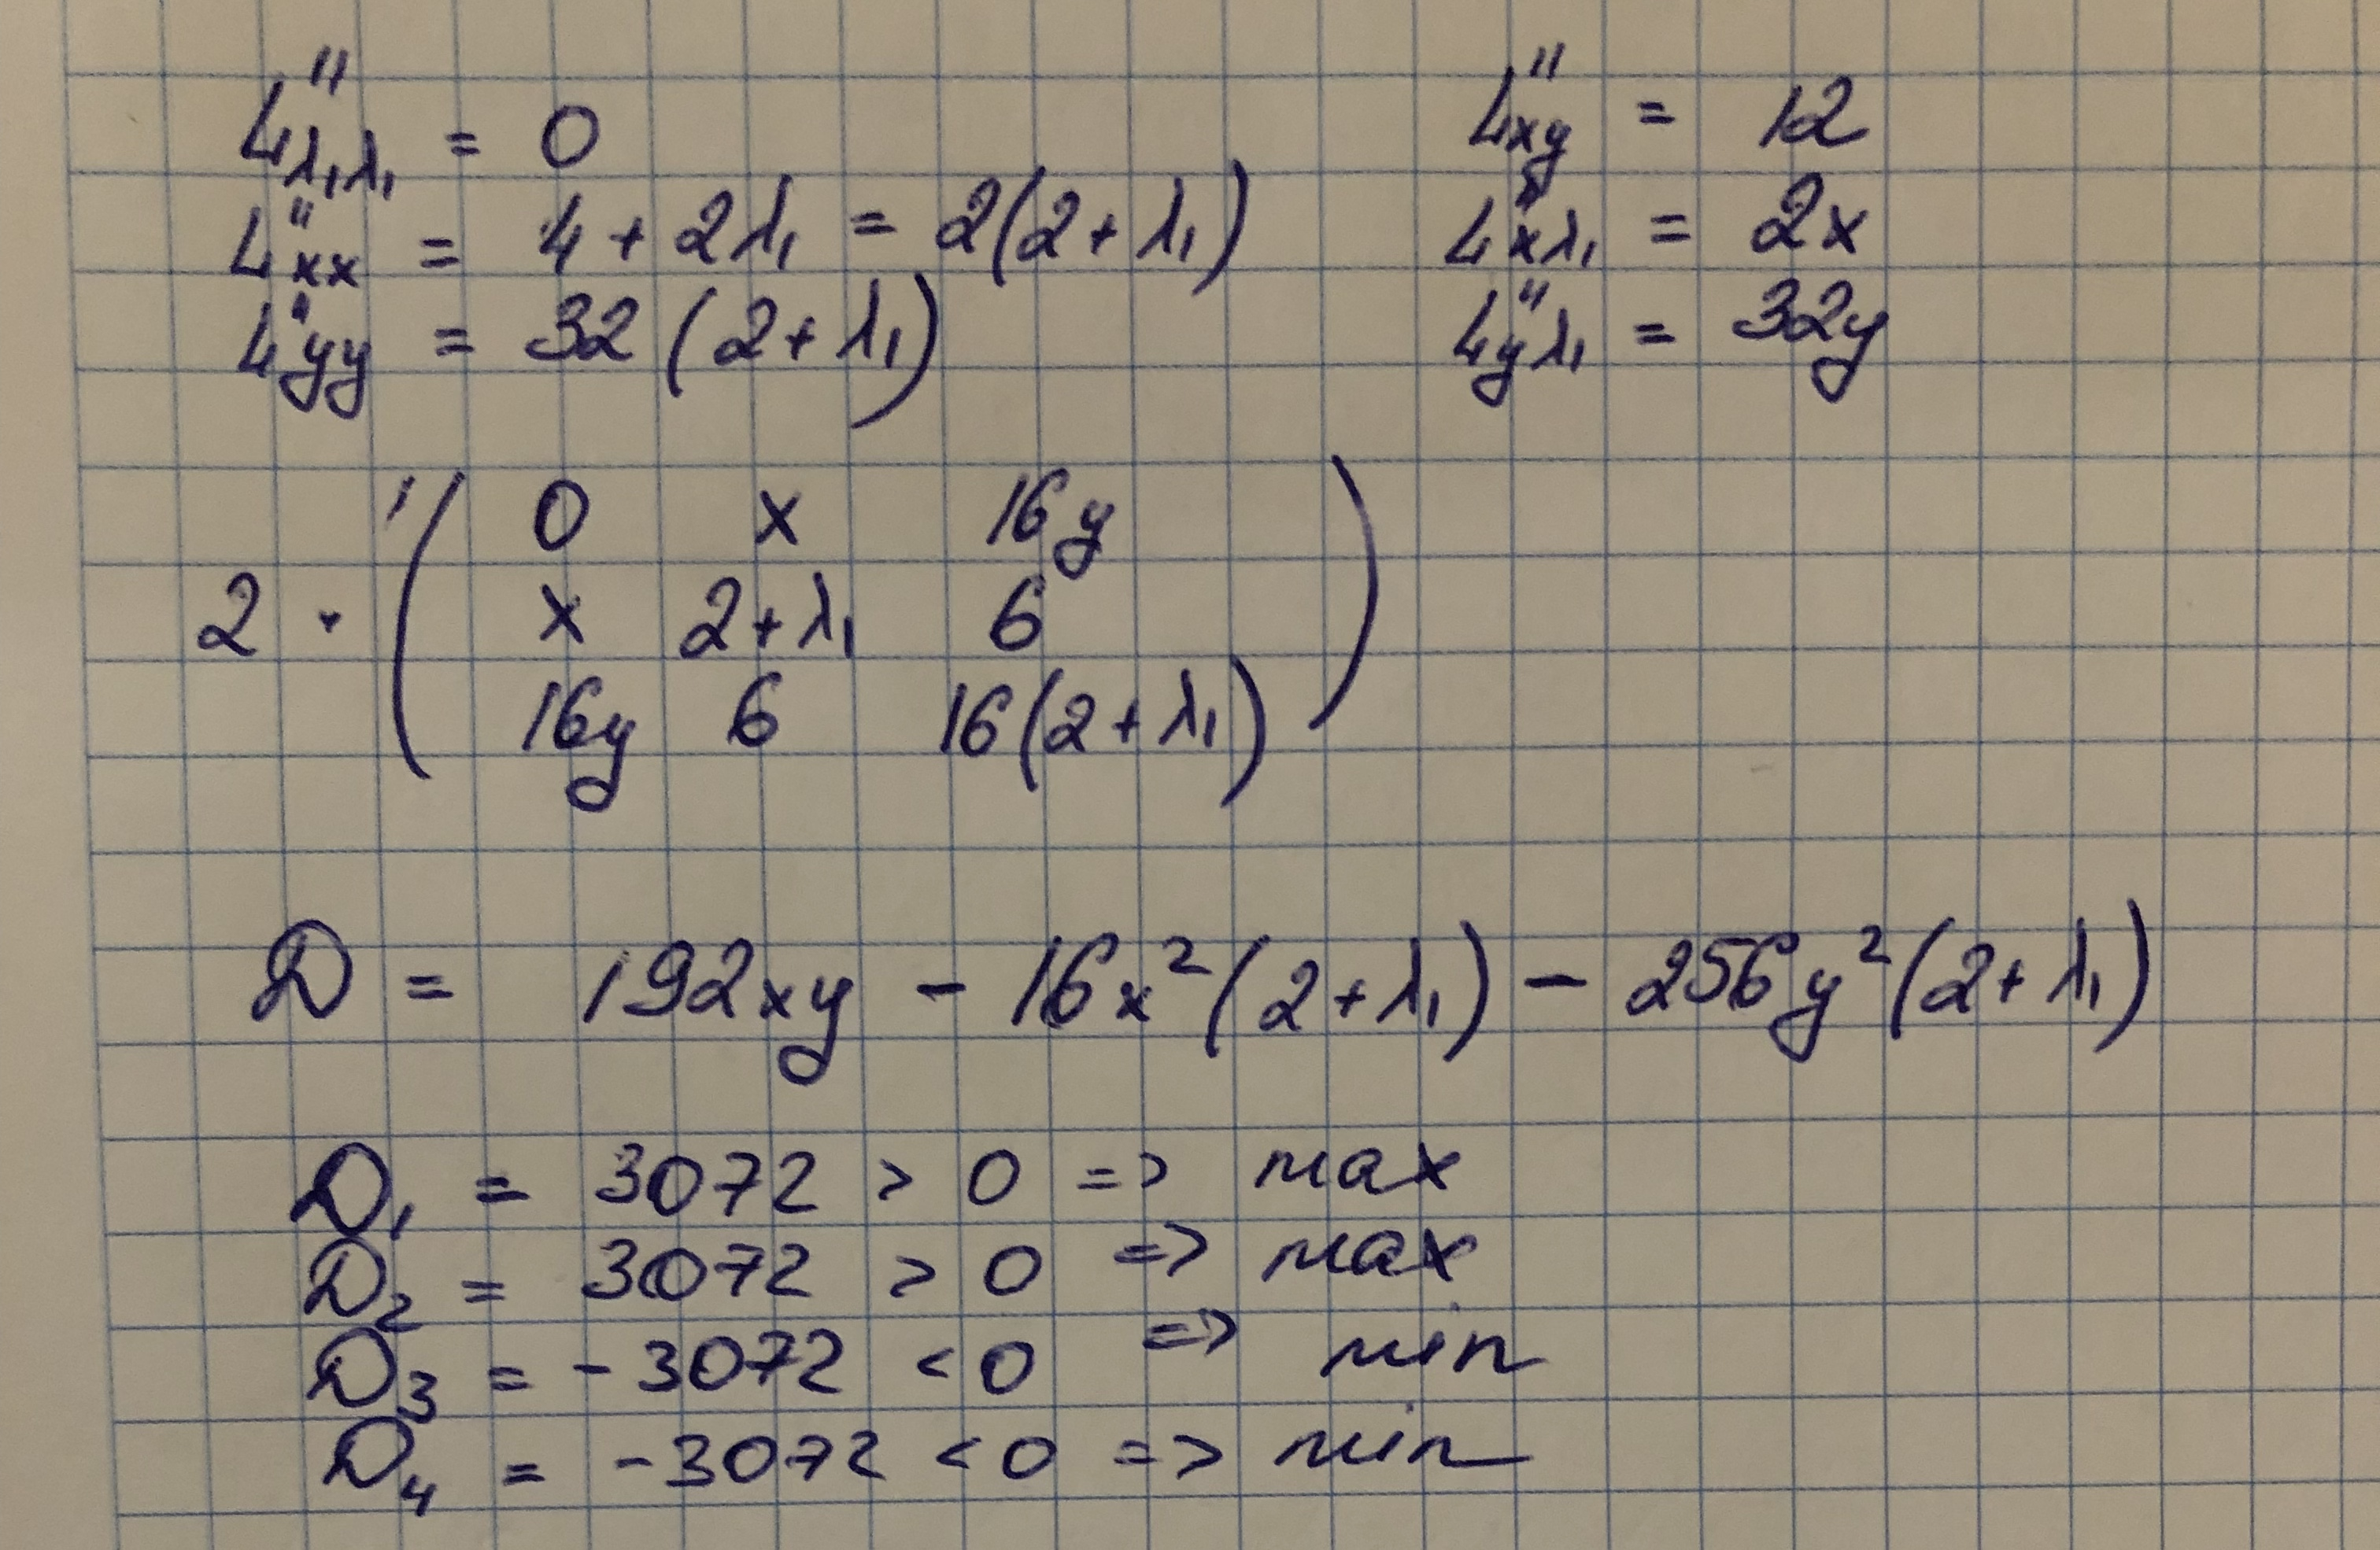

In [1]:
from IPython.display import Image, display

listOfImageNames = ['/Users/ian/GeekBrains/Matan/HW09/IMG_0378.jpg',
                    '/Users/ian/GeekBrains/Matan/HW09/IMG_0373.jpg',
                    '/Users/ian/GeekBrains/Matan/HW09/IMG_0374.jpg',
                    '/Users/ian/GeekBrains/Matan/HW09/IMG_0375.jpg',
                    '/Users/ian/GeekBrains/Matan/HW09/IMG_0376.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

3. Численно найти хотя бы один действительных корень системы нелинейных уравнений.

$$
\left\{\begin{array}{c}{x^{2}-y^{2}+3 x y^{3}-2 x^{2} y^{2}+2 x-3 y-5=0} \\ {3 y^{3}-2 x^{2}+2 x^{3} y-5 x^{2} y^{2}+5=0}\end{array}\right.
$$

In [33]:
from typing import Callable
import unittest
import numpy as np

def newton(f: Callable[[float], float], f_prime: Callable[[float], float], x0: float, 
    eps: float=1e-7, kmax: int=1e3) -> float:
    
    X, X_prev, i = np.array([[x0], [y0]]), np.array([[x0 + 2 * eps], [y0 + 2 * eps]]), 0
    
    while abs(np.linalg.norm(X) - np.linalg.norm(X_prev)) >= eps and i < kmax:
        X, X_prev, i = X - f(X) / f_prime(X), X, i + 1

    return X

def f(array) -> float:
    x = float(array[0])
    y = float(array[0])
    
    return np.array([
        [x*x - y*y + 3*x*y**3 - 2*x*x*y*y + 2*x - 3*y],
        [3*y**3 - 2*x*x + 2*y*x**3 - 5*x*x*y*y]
    ])

def f_prime(array) -> float:
    x = float(array[0])
    y = float(array[0])
    
    Jacobi = np.array([
        [2*x + 3*y**3 - 4*x*y**2 + 2, -2*y + 9*x*y*y - 4*x*x*y - 3],
        [-4*x + 6*x*x*y - 10*x*y*y, 9*y*y + 2*x**3 - 10*x*x*y]
    ])
    return np.linalg.det(Jacobi)

x0=3
y0=5

print (newton(f, f_prime, x0))

[[  1.        ]
 [531.56160634]]
